# Convolution Neural Network Homework Assignment

This is the 3rd homework assignment for CAP-4630 and we will go through some primary operations for image processsing and implement one of the earilest representative convolution neural network - LeNet-5 . \
You will use **"Tasks"** and **"Hints"** to finish the work. **(Total 100 Points)** \
For section 1, when you implement covolution and maxpooling, you are **not** allowed to use built-in functions in Machine Learning libaries such as Scikit-learn Keras, Tensorflow, Pytorch; but you are encouraged to employ Keras for second section.

**Task Overview:**
- Basic operations for Digital Image Processing (DIP)
- LeNet-5 (Google Colab is recommended for implementation)

## 1 - Basic Image Processing ##
### 1.1 Data Preparation

Import packages and prepare image data as an array for image processing. **(5 Points)**

**Tasks:**
1. Import numpy and rename it to np.
2. Import imageio and call imread to convert image to an array.
3. **DISPLAY** the image in the output box before image-array conversion.
4. **PRINT OUT** the size of the array
5. **PRINT OUT** the numeric matrix form of image, i.e. the obtained array after image-array conversion.

References:
- [numpy](www.numpy.org) is the fundamental package for scientific computing with Python.
- [imageio](https://imageio.github.io/) is a python library for basic image reading and writing.

**Hints:**
1. Image data is under current directory, i.e., "./image.jpg".
2. You may consider importing "display" and "Image" from IPython.display for image display.

shape:
 (30, 30) 

image matrix:
 [[ 98  89  78 112  90  93 158 112 122 117 107 121  90  75  67  93  73  67
   96 152 167 151 166 154 134 105  53  51  55  44]
 [ 34  31  51  38  16  50 195 161 138 173 200 209 194 206 222 237 223 195
  177 185 167 160 166 169 136  98  49  54  55  35]
 [ 78  84  94  71  81  69 190 204 233 240 249 234 232 241 250 235 235 236
  224 194 169 181 170 162 121  95  55  49  52  47]
 [ 79  58  90 127 103 137 253 244 254 222 223 219 235 228 232 206 201 215
  201 106 105 137 169 173 124  81  45  49  59  53]
 [ 31  75  44  81  89 191 242 255 228 208 231 233 236 222 227 199 177 192
  208 104 137 109 170 194 159  88  44  54  63  46]
 [ 85  66  51 145 129 225 239 206 242 233 247 231 210 218 232 202 190 173
  181  95 146  39 132 199 178 145 103  53  44  65]
 [ 81  60  76 178 216 214 209 230 240 229 230 211 157 176 214 218 185 186
  198 154 203  33 100 157 157 179 162  72  39  78]
 [104  89 152 176 168 117 182 226 242 235 238 207  82  50  94 145 136 157
  148 119 175  30

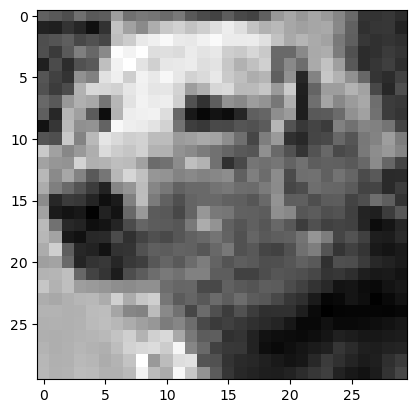

In [27]:
# Import useful libraries
import numpy as np
import imageio
from IPython.display import display, Image
import matplotlib.pyplot as plt

# Reading the image.
im = imageio.v3.imread("image.jpg")

# Displaying the image with pyplot.
plt.imshow(im, cmap = plt.cm.gray)

# Displaying the image with imageio.
i = Image(filename='image.jpg')
display(i)

print("shape:\n", im.shape, "\n")
print("image matrix:\n", im, "\n")

### 1.2 Implementation of Convolution Filter

Process the obtained array from the image with convolution operation. **(20 Points)**

**Tasks:**
1. Prepare a 3X3 Laplacian kernel (aka Laplacial filter) with array as convolution filter.
2. Conduct convolution on image with prepared kernel.
3. **PRINT OUT** convolution result for first ten rows.
4. **PRINT OUT** the shape of the convolution result.
5. **DISPLAY** convolution result as image with matplotlib. (Don't worry about the value <0 or >255. Scaling process will be conducted in imshow function to make sure valid display.)


**Hints:**
1. Laplacian kernel is widely used for edge detection. Its form is shown below:


![](https://drive.google.com/uc?export=view&id=15bP8KCwHLtglJ-WXV4wolm4m46mCp3HL)

2. You may consider the following steps for this implementation.\
    2.1 Extract all centriods of processing region for each convolution operation.\
    2.2 According to each centroid (i.e., the positions of kernel's center for all convolution operation across input), locate all indices of the elements within the local region for each convolution operation.\
    2.3 Given obtained indices, locate pixel values (i.e., our obtained array elements) and conduct element-wise product between pixel and kernel values.\
    2.4 Sum element-wise product results and assign the value to convolution result at corresponding location.\
    **Note: we did not conduct padding for processed array, and thus, convolution result will become smaller than original array. You may think about the reason.**
3. Validation for first 5X5 array (from upper-left corner), i.e., filtered_results[0:5,0:5]. The example figure is below.

[[ 134.   37.   98.  195.  173.]\
 [ -75.  -80.   56.  -65.  182.]\
 [  96.  -37. -163.   22.   68.]\
 [-101.  121.   81.  148.  -71.]\
 [   7.  127. -141.  159. -127.]]

![](https://drive.google.com/uc?export=view&id=18Iis1mJsvEaojZ7O3f3soE152Szwy8_Z)




image height:  30
image width:  30
kernal size:  3
offset:  1
output:  [[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

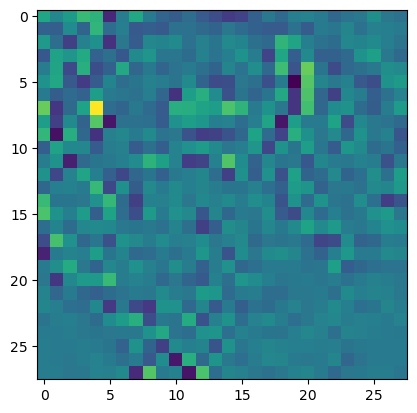

In [82]:
######## Convolution with Laplacian Filter ##################
kernel = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
])

DEBUG = 1

# Dimensions
image_height = im.shape[0]
image_width = im.shape[1]
kernel_size = len(kernel)

# New output dimensions without the border
output_height = image_height - 2
output_width = image_width - 2
# output = [[0] * output_width for _ in range(output_height)]
output = np.zeros((output_width, output_height))

# Offset to center the kernel on each pixel
offset = kernel_size // 2

if DEBUG == 1:
    print("image height: ", image_height)
    print("image width: ", image_width)
    print("kernal size: ", kernel_size)
    print("offset: ", offset)
    print("output: ", output)
    print("output width: ", len(output[0]))
    print("kernel: ", kernel)
    print("image: ", im)

# Convolution operation (ignoring borders for simplicity)
for i in range(offset, image_height - offset):
    for j in range(offset, image_width - offset):
        # Apply kernel on the neighborhood
        pixel_sum = 0
        for m in range(kernel_size):
            for n in range(kernel_size):
                pixel_value = im[i + m - offset][j + n - offset]
                kernel_value = kernel[m][n]
                pixel_sum += pixel_value * kernel_value
        output[i - offset][j - offset] = pixel_sum

# Print the resulting convolved image
for row in output:
    print(row)
    
# Displaying the image with pyplot.
plt.imshow(output)

# Checking to make sure it matches with the given output.
filtered_result = output[0:5, 0:5]
print(filtered_result)

### 1.3 Modification on Convolution Scheme

Conduct the convolution with the same filter as above, but change the stride to 2. **(5 Points)**

**Tasks:**
1. Modify the convolution process with stride=2
2. **PRINT OUT** convolution result for first ten rows.
3. **PRINT OUT** the shape of the convolution result.
4. **DISPLAY** convolution result as image with matplotlib.(Don't worry about the value <0 or >255. Scaling process will be conducted in imshow function to make sure valid display.)

**Hints:**
1. You may just reduce the centroid pool according to stride=2, and then, follow the same convolution process above.
    **Note: After increase of stride, the size of convolution result is further shrinked. You may think about the reason.**
2. Validation for first 5X5 array (from upper-left corner), i.e., filtered_results[0:5,0:5]. The example figure is below.

[[ 134.   98.  173.    5.    3.]\
 [  96. -163.   68.  -10.   37.]\
 [   7. -141. -127.  142.   -6.]\
 [  -1.  -46.  109.  -13.   11.]\
 [ 106.   49.  241.  -26.  -33.]]


![](https://drive.google.com/uc?export=view&id=1UPdXt5cY1umImu2chaQLfWAnqDEpFOGV)


[[ 134.   98.  173.    5.    3.  -87.  -92. -175.  -77.  -50.   25.  -58.
    -7.  -12.]
 [  96. -163.   68.  -10.   37.   49.   18.   43.  -30.  180.   16.  -43.
    28.   11.]
 [   7. -141. -127.  142.   -6.  -23.  -32.   31.   57.  205.  264. -135.
   -32.   61.]
 [  -1.  -46.  109.  -13.   11. -195.  159. -120.  -63.  143.  229. -165.
     8.  -27.]
 [ 106.   49.  241.  -26.  -33.   69.   84.   24.   13. -258.   -3.  125.
    40.  -22.]
 [ -79.   41.  -89.   18.  -31.   26.  103.  -10.   81.   77.  106.  -88.
    51.  -19.]
 [  76.   24.   15. -144.  -18.   -6.   36. -164.  -80. -120.  -65.   45.
   -33.  -32.]
 [ 196.  -18.   71.  -43.   20.   50.   42.   50.   59. -111.  -45.  -15.
    58. -169.]
 [ -38.  -43.   48.   -9.   -5.   26. -164.   61.  -16.   -5.  126.   96.
    -8.   71.]
 [-234.   26.  110.   29.  -39.  -31.   86. -111.  -10.   60.  -27.   15.
     1.   44.]
 [ -12.   41.   92.    7.    8.  -10.  -96.  -32.   52.  -13.    0.    6.
    -1.   10.]
 [  35.  -33.   42.  

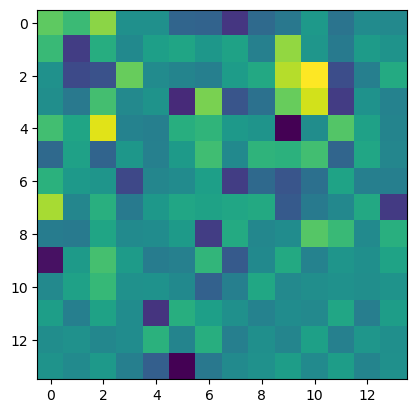

In [87]:
######## Convolution with Laplacian Filter and the setting of stride=2 ##################

# 3x3 Laplacian kernel (or any other kernel)
kernel = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
])

DEBUG = 1

# Dimensions
image_height = im.shape[0]
image_width = im.shape[1]
kernel_size = len(kernel)
stride = 2  # Set stride to 2

# New output dimensions with stride 2, excluding outer edges
output_height = (image_height - 2) // stride
output_width = (image_width - 2) // stride
# output = [[0] * output_width for _ in range(output_height)]
output = np.zeros((output_width, output_height))

# Offset to center the kernel on each pixel
offset = kernel_size // 2

# Convolution operation with stride, excluding the outer edges
for i in range(offset, image_height - offset, stride):
    for j in range(offset, image_width - offset, stride):
        # Apply kernel on the neighborhood
        pixel_sum = 0
        for m in range(kernel_size):
            for n in range(kernel_size):
                pixel_value = im[i + m - offset][j + n - offset]
                kernel_value = kernel[m][n]
                pixel_sum += pixel_value * kernel_value
        # Calculate output coordinates with stride applied
        output_i = (i - offset) // stride
        output_j = (j - offset) // stride
        output[output_i][output_j] = pixel_sum

# Print the resulting convolved image with stride 2 and no borders
print(output)

# Displaying the image with pyplot.
plt.imshow(output)

# Checking to make sure it matches with the given output.
filtered_result = output[0:5, 0:5]
print(filtered_result)

### 1.4 Implementation of MaxPooling

Process the obtained array from the image with MaxPooling operation. **(15 Points)**

**Tasks:**
1. Prepare a 2X2 pooling mask.
2. Conduct max pooing on image with prepared mask.
3. **PRINT OUT** convolution result for first ten rows.
4. **PRINT OUT** the shape of the convolution result.
5. **DISPLAY** convolution result as image with matplotlib.(Don't worry about the value <0 or >255. Scaling process will be conducted in imshow function to make sure valid display.)

**Hints:**
1. You may just modify the centroid pool to top-left corner pool, and then, follow the same strategy above.\
    **Note: After the pooling, the size of the array is shrinked. You may think about the reason.**
2. Validation for first 5X5 array (from upper-left corner), i.e., pooled_results[0:5,0:5].The example figure is below.

[[ 98. 112.  93. 195. 173.]\
 [ 84. 127. 137. 253. 254.]\
 [ 85. 145. 225. 255. 242.]\
 [104. 178. 216. 230. 242.]\
 [ 95. 186. 147. 248. 242.]]

![](https://drive.google.com/uc?export=view&id=1a18IWjrN0xHcp7bSNuj8kUM4JFFj3ebd)



[[ 98. 112.  93. 195. 173. 209. 206. 237. 223. 185. 167. 169. 136.  54.
   55.]
 [ 84. 127. 137. 253. 254. 249. 241. 250. 236. 224. 181. 173. 124.  55.
   59.]
 [ 85. 145. 225. 255. 242. 247. 236. 232. 192. 208. 146. 199. 178. 103.
   65.]
 [104. 178. 216. 230. 242. 238. 176. 218. 186. 198. 203. 165. 179. 168.
   78.]
 [ 95. 186. 147. 248. 242. 221.  62.  74.  95. 182. 155.  91. 145. 161.
  116.]
 [201. 201. 229. 217. 210. 188. 169. 164. 111. 154.  81. 104. 104. 141.
  158.]
 [184. 212. 180. 214. 193. 148. 191. 141. 127. 140. 114. 113. 115. 139.
  102.]
 [172. 105.  61. 149. 189. 119. 106. 120. 109. 148.  95. 110. 102. 110.
   94.]
 [186.  41.  34. 104. 153.  91. 172. 147.  98. 143. 136.  92.  83.  37.
   87.]
 [207.  94.  42.  75.  95.  99. 104. 120. 101.  94. 116. 149.  83.  64.
   42.]
 [181. 191.  67.  77. 109. 121. 129.  99.  94.  86.  97.  89.  79.  59.
   34.]
 [198. 191. 184. 208. 207. 118. 103. 107. 109.  94.  76.  51.  21.  14.
   25.]
 [180. 178. 190. 183. 188. 137. 109.  79

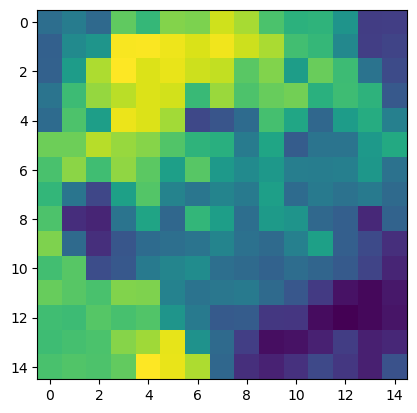

In [116]:
######## MaxPooling with the setting of 2X2 ##################

def maxpool2x2(matrix):
    
    # Ensure the input matrix has even dimensions
    assert matrix.shape[0] % 2 == 0 and matrix.shape[1] % 2 == 0, "Matrix dimensions must be even for 2x2 pooling"

    # Initialize the output matrix
    output = np.zeros((matrix.shape[0] // 2, matrix.shape[1] // 2))

    # Apply 2x2 max pooling
    for i in range(0, matrix.shape[0], 2):
        for j in range(0, matrix.shape[1], 2):
            # Get the maximum value in the 2x2 window
            output[i // 2, j // 2] = np.max(matrix[i:i+2, j:j+2])
    
    return output

pooled_matrix = maxpool2x2(im)
print(pooled_matrix)
    
# Displaying the image with pyplot.
plt.imshow(pooled_matrix)

# Checking to make sure it matches with the given output.
filtered_result = pooled_matrix[0:5, 0:5]
print(filtered_result)

## 2 - Convolution Neural Network ##

In this section, we will use LeNet-5 (LeCun et al., 1998), one of representative deep nueral networks, to solve a  classification problem with Fashion MNIST benchmark. You can feel free to read the original paper at http://vision.stanford.edu/cs598_spring07/papers/Lecun98.pdf.

### 2.1 Training Data Preparation

Import useful packages and prepare Fashion MNIST data. **(20 Points)**

**Tasks:**
1. Use **torchvision.datasets** to download Fashion MNIST data for training and testing.
2. Use **torchvision.transforms** to preprocess training and testing data using  using transformations including: random crop(i.e., randomly crop into 28x28 blocks with padding 4), random rotation (i.e., randomly rotates within 15 degree) and normalization (normalize to mean .1307 and std 0.3081). You may convert the image from pil.Image to torch.Tensor if necessary.
3. Use **torch.utils.data.DataLoader** to load the training and testing data with mini-batch, set the batch size to be 128.
3. **PRINT OUT** images in the first mini batch of training set with their correponding labels (i.e., index from 0-9).
4. **PRINT OUT** the number of training samples, the number of test samples and the shape of data.

**Hints**
1. You can refer to the example on https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html about data preprocessing.
2. You can read the documentation about datasets supported by pytorch: https://pytorch.org/vision/main/datasets.html?highlight=datasets

In [ ]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

# Define transformation for training and testing data.
# For training, use RandomCrop, RandomRotation and Normalization with mean 0.1307 variance 0.3081
# For testing, just use Normalization.
# train_transform = ...
# test_transform

# Load the training and testing datasets from Pytorch
# train_data = ...
# test_data = ...


# Print out first image and its correponding label index using matplotlib.
# ...

### 2.2 Implement LeNet-5 Achitecture

Construct LeNet-5 as learning model for Fashion MNIST classification task. **(15 Points)**

**Tasks:**
1. Build LeNet-5 by creating a new class named 'Net' that inherit nn.Module. Override __init__ and **forward** functions to include necessary network componenets and forward process for neural network.

2. **PRINT OUT** the model summary using torchsummary library (import torchsummary).

**Hints:**
1. You may consider the convolution neural network shown in class as an example. Or https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html.
2. The general structure of LeNet-5 is listed below. Try to fill in the missing parts along with pytorch documentations (https://pytorch.org/docs/stable/index.html).
3. Some architecture settings are listed below.
    - To have 32 X 32 input, you need padding=2 for the first 2D convolution filter (original image is 28 X 28)
    - The kernel size for 2D convolution filter is **5 X 5**. You may think about the reason by calculation.
    - We change tanh activation to **"relu"** activation here.
    - We use MaxPooling instead of original AveragePooling. Please use size 2 X 2 for implementation.
    - Please use **Flatten** to onvert 2D convolution layer to 1D fully connected layer.
    - Gaussian connections are replaced with Softmax, and thus, the outputs are activated by Softmax function based on the number of classes.

4. Validation result:
    - Total params: 61,706
    - Trainable params: 61,706
    - Non-trainable params: 0

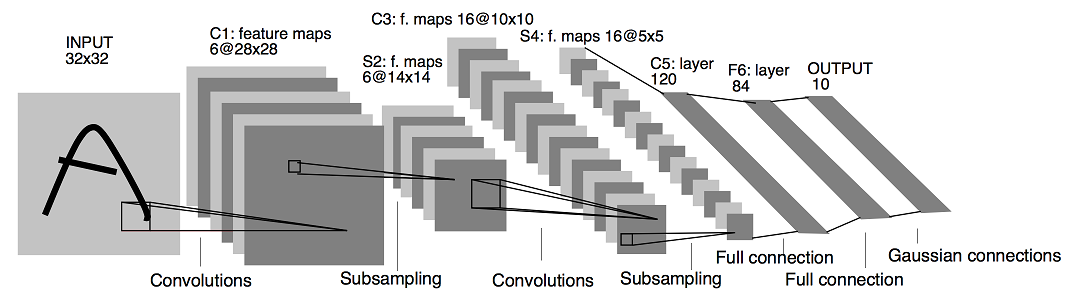

**References:**
- http://yann.lecun.com/exdb/lenet/


In [ ]:
from torchsummary import summary

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(####)
        self.conv2 = nn.Conv2d(####)
        self.fc1 = nn.Linear(####)
        self.fc2 = nn.Linear(####)
        self.fc3 = nn.Linear(####)

    def forward(self, x):
        x = self.conv1(x)
        x = ####
        x = F.max_pool2d(####)
        x = self.conv2(x)
        x = ####
        x = F.max_pool2d(####)
        x = torch.Flatten(####)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        x = F.relu(x)
        output = self.fc3(x)
        return output

# Decide whether you want to run your model on cpu or gpu.
device = 'cuda' if torch.cuda.is_available() else 'cpu'
net = Net().to(device)
summary(net, (1, 28, 28))

### 2.3 Training LeNet-5 Model

Train LeNet-5 model with specific training strategy. **(20 Points)**

**Tasks:**
1. Pick **SGD optimizer** with learning rate of **0.1**, momentum of **0.9**, and **nesterov=True**, for model training.
2. Pick **cross-entropy** loss function for optimization and evaluation metrics is set to **accuracy**.
3. Train the model with **10 epochs** and **PRINT OUT** : **train loss** and **train accuracy** after each epoch.
4. Evaluate model with test data set and **PRINT OUT** : **test loss** and **test accuracy**.

**Hints:**
1. You may consider the examples from Pytorch for optimizer. https://pytorch.org/docs/stable/optim.html
2. You may see slightly different results every time you run the training. It is normal since there is randomness for training. You may use different random seed to validate this observation.
4. You should expect the BEST validation accuracy is above 87% which may not be the result from last epoch.”

In [ ]:
### Train with SGD optimizer with learning rate =0.1, regularizer=4e-5, momentum=0.9


In [ ]:
### Print out the evaluation results, including test loss and test accuracy.


### 2.4 Visualization (Bonus session, optional)

Use T-sne to visualize the validation clustering result. **(10 Points)**

**Hint:**
1. Use 'sklearn' python package. This is a complicate operation and you are free to use this package.
2. Read the instruction from 'sklearn.manifold.TSNE' and the paper, https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf to understand the idea. You can feel free to refer to other online examples.
3. Visualize the model's prediction on the testing set using T-sne.

In [3]:
import sklearn as sk
import matplotlib.pyplot as plt